In [736]:
sentence_bleu([['this', 'op', 'gg']], ['this', 'open', 'gg'])

1.646211035903463e-231

## Задание 3.4

Требуется опеделить:

* превосходит ли один переводчик в среднем по парам второй переводчик по переводу
* связано ли качество перевода для разных языковых пар для двх переводчиков?
При подсчете BLEU учитывать только слова, регистр не учитывать.

In [462]:
#воспользуемся готовой библиотекой с реализацией оценки BLEU
from nltk.translate.bleu_score import sentence_bleu
# score = sentence_bleu([reference], hypothesis)

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import mannwhitneyu

-----

In [ ]:
# task3.4 - 1

### Рассмотрим данные

Чтобы воспользоваться *sentence_bleu* удалим все посторонние символы и цифры, приведем к нижнему регистру, разделим строчки на слова.

In [548]:
''' data preprocessing'''

def get_word_list(name):
    # редактирование текстовых файлов построчно
    orig_data = [line.strip() for line in open('data/mt/' + str(name) + '.txt', 'r')]
    prep_data = []
    for i in range(len(orig_data)):
        orig_data[i] = re.sub(r'[^\w\s]','',orig_data[i].replace('9','').replace('8','').replace('7','').replace('6','').replace('5','').replace('4','').replace('3','').replace('2','').replace('1','').replace('0',''))
        prep_data += [orig_data[i].lower().split()] 
    return prep_data

def score(num, name):
    # оценка качества перевода
    score = []
    for i in range(len(get_word_list(str(name)+'_'+str(num)))-1):
        score.append(sentence_bleu([get_word_list(str(name) + '_'+str(num))[i]], get_word_list(str(name) + '_gold')[i]))
    return score

def sample(name):
    # компоновка оценок переводчика 1 и 2 по языковой паре
    dict_words = {}
    for num in [1, 2]:
        dict_words[str(name)+'_'+str(num)] = score(num, name)
    if len(dict_words[str(name)+'_1']) > len(dict_words[str(name)+'_2']):
        del dict_words[str(name)+'_1'][-1]
    elif len(dict_words[str(name)+'_1']) < len(dict_words[str(name)+'_2']):
        del dict_words[str(name)+'_2'][-1]
    return dict_words

In [737]:
# выборки score-ов для каждой языковой пары 
de_en = pd.DataFrame(sample('de_en'))
en_kk = pd.DataFrame(sample('en_kk'))
en_ru = pd.DataFrame(sample('en_ru'))
ru_de = pd.DataFrame(sample('ru_de'))
ru_kk = pd.DataFrame(sample('ru_kk'))

In [466]:
de_en.head()

,de_en_1,de_en_2
0,2.150000e-01,2.150000e-01
1,3.826171e-78,1.951797e-01
2,9.788429e-232,9.788429e-232
3,0.000000e+00,0.000000e+00
4,1.257897e-231,1.189646e-231


In [458]:
en_kk.head()

,en_kk_1,en_kk_2
0,4.192789e-78,2.626910e-01
1,9.938674e-232,1.017636e-231
2,1.384293e-231,1.384293e-231
3,0.000000e+00,0.000000e+00
4,1.448850e-231,1.603416e-231


**Задача:**

$H_0:$ среднее значение качества переводчиков равны;

$H_1:$ среднее значение качества перевода у второго переводчика лучше, чем у первого;


In [559]:
#односторонний тест Уилкоксона
for pair in [de_en, en_kk, en_ru, ru_kk, ru_de]:
    _, p = st.wilcoxon(pair.iloc[:,0].values, pair.iloc[:,1].values, alternative = 'less')
    print('Ддя языковой пары {} -- {}'.format(pair.columns.tolist()[0][:-2], p))

Ддя языковой пары de_en -- 0.39549791017787095
Ддя языковой пары en_kk -- 0.27604272600139623
Ддя языковой пары en_ru -- 0.30772964366578437
Ддя языковой пары ru_kk -- 8.66108116572057e-07
Ддя языковой пары ru_de -- 0.33000618104493495


По значениям $p\_value$ можно сделать вывод, что в целом переводчики показывают одинаковое качество перевода, за исключением языковой пары $ru\_kk$ - второй переводчик на этой языковой паре показал результат лучше

---------

In [ ]:
#task3.4 - 2

Рассмотрим все языковые пары

### de_en

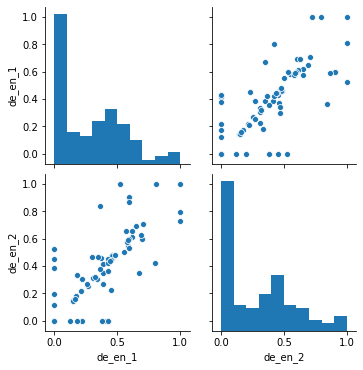

In [522]:
_ = sns.pairplot(de_en)

In [523]:
np.corrcoef(de_en.values.T)

array([[1.        , 0.83348408],
       [0.83348408, 1.        ]])

In [774]:
kk, p_value = st.spearmanr(de_en.values.T[0], de_en.values.T[1])
print('Коэффициент корреляции Спирмена = {}, p_value = {}'.format(kk, p_value))

Коэффициент корреляции Спирмена = 0.8939587172262563, p_value = 6.19791264933685e-36


### en_ru

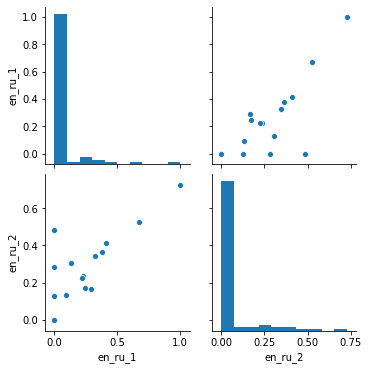

In [530]:
_ = sns.pairplot(en_ru)

In [533]:
np.corrcoef(en_ru.values.T)

array([[1.        , 0.87014939],
       [0.87014939, 1.        ]])

In [773]:
kk, p_value = st.spearmanr(en_ru.values.T[0], en_ru.values.T[1])
print('Коэффициент корреляции Спирмена = {}, p_value = {}'.format(kk, p_value))

Коэффициент корреляции Спирмена = 0.940053073949271, p_value = 2.7000730436196347e-44


### ru_de

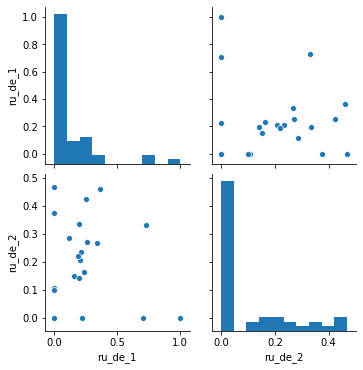

In [535]:
_ = sns.pairplot(ru_de)

In [536]:
np.corrcoef(en_ru.values.T)

array([[1.        , 0.87014939],
       [0.87014939, 1.        ]])

In [772]:
kk, p_value = st.spearmanr(en_ru.values.T[0], en_ru.values.T[1])
print('Коэффициент корреляции Спирмена = {}, p_value = {}'.format(kk, p_value))

Коэффициент корреляции Спирмена = 0.940053073949271, p_value = 2.7000730436196347e-44


##### Вывод:  
По графиком было видно, что в парах $de\_en, ru\_de, en\_ru$  есть лин зависимость. Коэф-ты корр-ии Спирмена и Пирсена подтвердили линейную взаимосвязь.

### en_kk

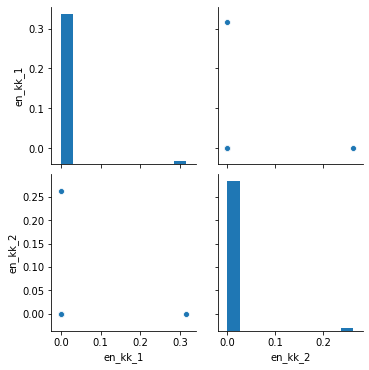

In [615]:
_ = sns.pairplot(en_kk)

Как видно из графика, имеется выброс. Зададим новую выборку без него

In [713]:
n = min(np.where(0 == en_kk.values.T[0])[0].shape[0], np.where(0 == en_kk.values.T[1])[0].shape[0]) 
print('Размерность выборки {}, из них {} равны нулю '.format(len(en_kk.values.T[1]),n))

Размерность выборки 60, из них 25 равны нулю 


In [723]:
a = (np.where(0.1 < en_kk.values.T[0])[0][0], 0)
b = (np.where(0.1 < en_kk.values.T[1])[0][0],1)
print('Выбросы в ячейках', a, b)

Выбросы в ячейках (6, 0) (0, 1)


In [748]:
#т.к. min нулей в 1 столбце, то удаляем строки по 1-ому столбцу

In [753]:
en_kk_0 = en_kk.drop(np.where(0 == en_kk.values.T[1])[0], inplace=False)

In [746]:
en_kk_new = en_kk.drop(np.where(0 == en_kk.values.T[1])[0], inplace=False).drop([6, 0],inplace=False)

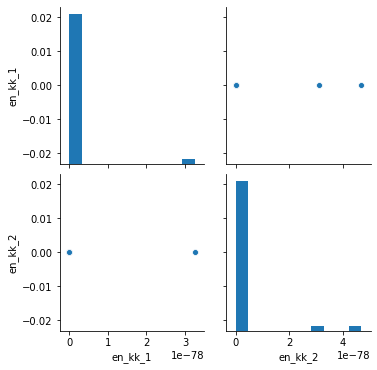

In [750]:
_ = sns.pairplot(en_kk_new)

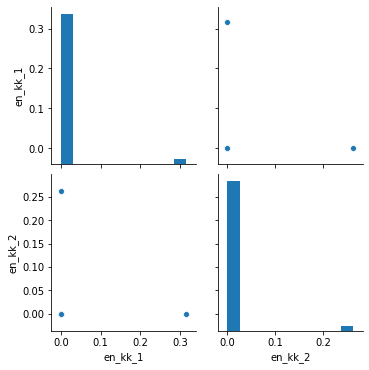

In [754]:
_ = sns.pairplot(en_kk_0)

In [751]:
np.corrcoef(en_kk.values.T)

array([[ 1.        , -0.01694915],
       [-0.01694915,  1.        ]])

In [755]:
np.corrcoef(en_kk_0.values.T)

array([[ 1.        , -0.02941176],
       [-0.02941176,  1.        ]])

In [752]:
np.corrcoef(en_kk_new.values.T)

array([[1.       , 0.5349189],
       [0.5349189, 1.       ]])

Удаление только выбросов незначительно улучшило корреляцию Пирсена, но с удалением еще и нулевых элементов, коэф корреляции  Пирсена заметно вырос

In [770]:
_, p_value = st.pearsonr(en_kk.values.T[0], en_kk.values.T[1])
print('Критерий Пирсона для первоначальной выборки, p_value = {}'.format(p_value))

_, p_value = st.pearsonr(en_kk_0.values.T[0], en_kk_0.values.T[1])
print('Коэффициент Пирсона для выборки без выброса с нулями, p_value = {}'.format(p_value))

_, p_value = st.pearsonr(en_kk_new.values.T[0], en_kk_new.values.T[1])
print('Коэффициент Пирсона для обработанной выборки, p_value = {}'.format(p_value))

Критерий Пирсона для первоначальной выборки, p_value = 0.8977256121774382
Коэффициент Пирсона для выборки без выброса с нулями, p_value = 0.866804233137719
Коэффициент Пирсона для обработанной выборки, p_value = 0.0013399861954228609


In [801]:
_, p_value = st.spearmanr(en_kk.values.T[0], en_kk.values.T[1])
print('Коэффициент Спирмена для первоначальной выборки, p_value = {}'.format(p_value))

_, p_value = st.spearmanr(en_kk_0.values.T[0], en_kk_0.values.T[1])
print('Коэффициент Спирмена для выборки без выброса с нулями, p_value = {}'.format(p_value))

_, p_value = st.spearmanr(en_kk_new.values.T[0], en_kk_new.values.T[1])
print('Коэффициент Спирмена для обработанной выборки, p_value = {}'.format(p_value))

Коэффициент Спирмена для первоначальной выборки, p_value = 5.100227507984022e-20
Коэффициент Спирмена для выборки без выброса с нулями, p_value = 6.09743240227544e-06
Коэффициент Спирмена для обработанной выборки, p_value = 2.006179116096198e-06


Критерий Пирсена плохо реагирует на выбросы, но с удалением выбросов и нулевых элементов получаем, что нулевая гипотеза отвергается (о независимости), тогда как критерий Спирмена и без преобразования данных отверг нулевую гипотезу.

##### Вывод:  
В языковой паре $en\_kk$ наблюдается лин взаимосвязь, а в паре $ru\_kk$ - нет